## Week_03: Homework_03: Exploratory Data Analysis
**Course:** WMASDS04-Introduction to Data Science with Python
<br>**Name:** Roksana Parvin
<br>**Student_ID:** 20231177

## <font color='#b25600'>  Problem_01: Use the Bollywood Dataset to Answer Questions 1 to 12 </font>
The data file bollywood.csv contains box office collection and social media promotion information about 
movies released in 2013−2015 period. Following are the columns and their descriptions.

### <font color='#b25600'> Dataset Description </font>
* SlNo – Release Date
* MovieName – Name of the movie
* ReleaseTime – Mentions special time of release. LW (Long weekend), FS (Festive Season), HS (Holiday Season), N (Normal)
* Genre – Genre of the film such as Romance, Thriller, Action, Comedy, etc.
* Budget – Movie creation budget
* BoxOfficeCollection – Box office collection
* YoutubeViews – Number of views of the YouTube trailers
* YoutubeLikes – Number of likes of the YouTube trailers
* YoutubeDislikes – Number of dislikes of the YouTube trailers

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#importing data into dataframe
data=pd.read_csv('hw_3_data_bollywood_movies.csv')
#setting index
data=data.set_index('SlNo')
data.head()

,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
SlNo,,,,,,,,,
1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


#####  <font color='#b25600'> Use Python code to answer the following questions: 


#### <font color='#b25600'> 1. How many records are present in the dataset? Print the metadata information of the dataset.

In [3]:
# number of records= number of rows
records=data.shape[0]
print(records,' records are present in the dataset.')
# metadata
print('Metadata information of the dataset')
print('_'*50)
data.info()



149  records are present in the dataset.
Metadata information of the dataset
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 1 to 149
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Release Date         149 non-null    object 
 1   MovieName            149 non-null    object 
 2   ReleaseTime          149 non-null    object 
 3   Genre                149 non-null    object 
 4   Budget               149 non-null    int64  
 5   BoxOfficeCollection  149 non-null    float64
 6   YoutubeViews         149 non-null    int64  
 7   YoutubeLikes         149 non-null    int64  
 8   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 11.6+ KB


####  <font color='#b25600'> 2. How many movies got released in each genre? Which genre had highest number of releases? Sort
number of releases in each genre in descending order.

In [4]:
#How many movies got released in each genre?
genre=data['Genre'].value_counts()
display(genre)

Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: Genre, dtype: int64

In [5]:
#highest number of releases
top_genre = genre.idxmax()
display(top_genre)

'Comedy'

In [6]:
#This is already sorted in descending order. Still I have written the sort function
display(genre.sort_values(ascending=False))

Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: Genre, dtype: int64

####  <font color='#b25600'>  3. How many movies in each genre got released in different release times like long weekend, festive
season, etc. (Note: Do a cross tabulation between Genre and ReleaseTime.)

In [7]:
#cross tabulation
genre_release_counts = pd.crosstab(data['Genre'], data['ReleaseTime'])
display(genre_release_counts)

ReleaseTime,FS,HS,LW,N
Genre,,,,
Action,3,3,3,15
Comedy,3,5,5,23
Drama,4,6,1,24
Romance,3,3,4,15
Thriller,4,1,2,22


####  <font color='#b25600'> 4. Which month of the year, maximum number movie releases are seen? (Note: Extract a new column
called month from ReleaseDate column.)

In [8]:
# extracting month from release column
data['Month']= data['Release Date'].str.split('-').str.get(1)

# Pop the column from its current location
column_to_move = data.pop('Month')

# Reinsert the column at the desired location
data.insert(1, 'Month', column_to_move)
#highest release month
highest_release_month=data['Month'].value_counts().idxmax()
print(highest_release_month)


Jan


### <font color='darkblue'> Interpretation
<font color='darkblue'> The month January has seen the maximum movie release.</font>

####  <font color='#b25600'>  5. Which month of the year typically sees most releases of high budgeted movies, that is, movies with
budget of 25 crore or more?

In [9]:
# filter for movies with budget are more than 25 crore 
high_budget=data[data['Budget']>=25]

# Highest budget movies
month_counts = high_budget.groupby('Month').size().reset_index(name='Number_of_Releases')
most_releases_month = month_counts[month_counts['Number_of_Releases'] == month_counts['Number_of_Releases'].max()]
most_releases_month

,Month,Number_of_Releases
3,Feb,9


### <font color='darkblue'> Interpretation
<font color='darkblue'> The month February sees most releases of high budgeted movies.</font>

####  <font color='#b25600'> 6. Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on
investment (ROI) as (BoxOfficeCollection – Budget) / Budget.

In [10]:
# calculate ROI
data['ROI']=((data['BoxOfficeCollection'] - data['Budget']) / data['Budget']) * 100

# Filtering top 10 movies
top_10_movies = data.nlargest(10, 'ROI')[['MovieName', 'ROI']]
#Assigning index
assign_index = [1,2,3,4,5,6,7,8,9,10]
top_10_movies.index=assign_index
#Displaying top 10 movies
display(top_10_movies)

,MovieName,ROI
1,Aashiqui 2,816.666667
2,PK,764.705882
3,Grand Masti,751.428571
4,The Lunchbox,750.000000
5,Fukrey,624.000000
6,Mary Kom,593.333333
7,Shahid,566.666667
8,Humpty Sharma Ki Dulhania,550.000000
9,Bhaag Milkha Bhaag,446.666667
10,Chennai Express,426.666667


####  <font color='#b25600'> 7. Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the 
average ROI for different release times.

In [11]:
# Calculate the average ROI for different release times.
group = data.groupby('ReleaseTime')['ROI'].mean().sort_values(ascending=False).reset_index(name='Avg_ROI')

#checing if the ROI is higher in fe
if group.loc[0,'ReleaseTime']=='LW'or 'FS' and group.loc[1,'ReleaseTime']=='LW'or 'FS':
    print('Yes, long weekend or festival season has the higher ROI')   
else:
    print("No, long weekend or festival season don't have the higher ROI")

print('\nAverage ROI of different release time-')
display(group)

Yes, long weekend or festival season has the higher ROI

Average ROI of different release time-


,ReleaseTime,Avg_ROI
0,LW,112.720531
1,FS,97.385320
2,HS,85.086678
3,N,65.772163


####  <font color='#b25600'> 8. Draw a histogram and a distribution plot to find out the distribution of movie budgets. Interpret the plot 
to conclude if the most movies are high or low budgeted movies.

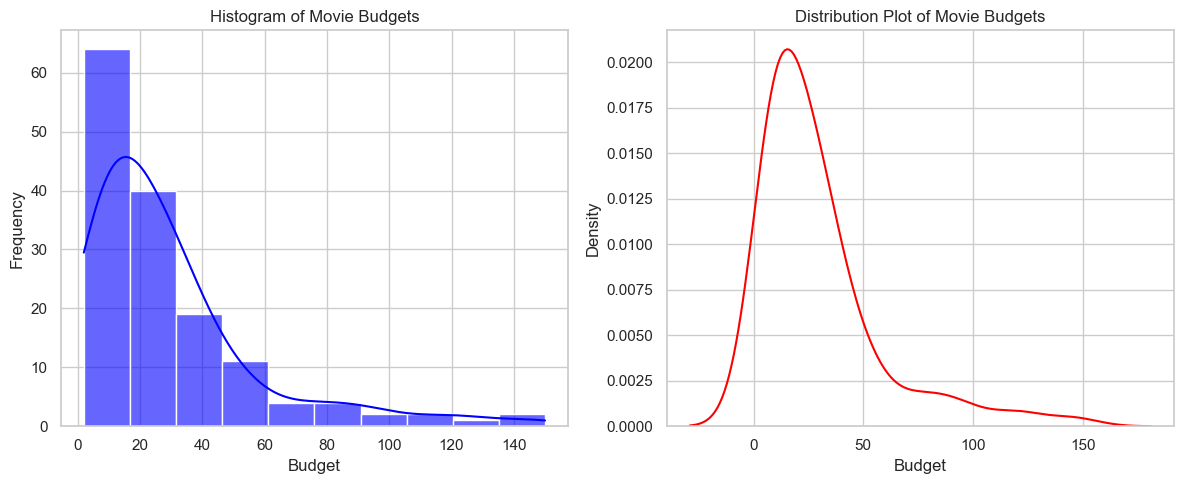

In [12]:
# Create a list of movie budgets (replace this with your actual data)
budgets =data['Budget']

# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a figure with two subplots (histogram and distribution plot)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plotting histogram
sns.histplot(budgets, bins=10, ax=axes[0], kde=True, alpha=.6, color='blue')
axes[0].set_xlabel("Budget")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Histogram of Movie Budgets")

# Plotting a distribution plot (Kernel Density Estimate)
sns.kdeplot(budgets, ax=axes[1],color='red')
axes[1].set_xlabel("Budget")
axes[1].set_ylabel("Density")
axes[1].set_title("Distribution Plot of Movie Budgets")

# Show the plots
plt.tight_layout()
plt.show()





### <font color='darkblue'> Interpretation
<font color='darkblue'> According to the plots, the bin 0-20 has the highest number of frequncy which means that the majority of movies in the dataset are low-budget movies. On the otherhand, the higher budget bin like, 120-140 has smaller number of movies.</font>

####  <font color='#b25600'>  9. Compare the distribution of ROIs between movies with comedy genre and drama. Which genre
typically sees higher ROIs?

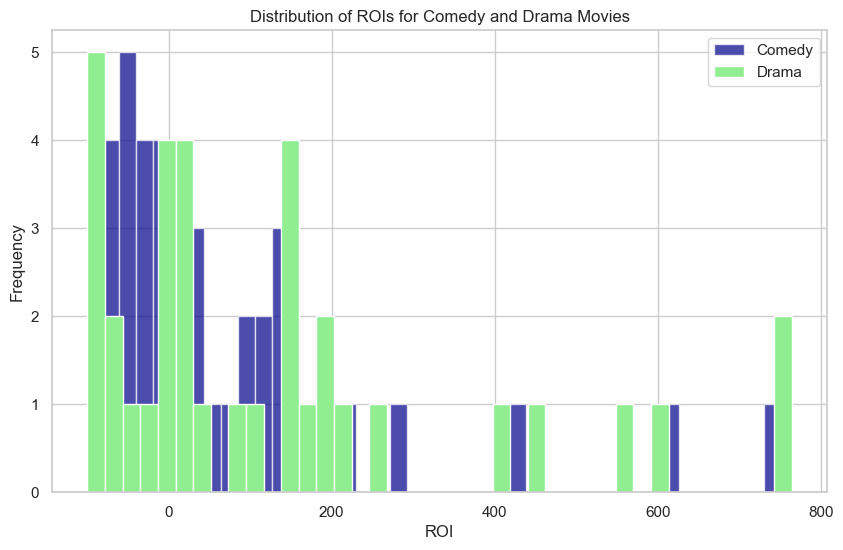

In [13]:

# Filter movies with the 'Comedy' genre
comedy_movies = data[data['Genre'] == 'Comedy']

# Filter movies with the 'Drama' genre
drama_movies = data[data['Genre'] == 'Drama']

# Create histograms to compare the ROI distributions
plt.figure(figsize=(10, 6))

# Plot the histogram for Comedy movies
plt.hist(comedy_movies['ROI'], bins=40, alpha=0.7, label='Comedy', color='darkblue')

# Plot the histogram for Drama movies
plt.hist(drama_movies['ROI'], bins=40,  label='Drama', color='lightgreen')

# Add labels and a legend
plt.xlabel('ROI')
plt.ylabel('Frequency')
plt.title('Distribution of ROIs for Comedy and Drama Movies')
plt.legend()

# Show the plot
plt.show()

### <font color='darkblue'> Interpretation
<font color='darkblue'> According to the plots the genre Drama typically sees the higher ROI since the green bars (represents Drama) comaperatively has mor frequencies than green bars(represents Comedy).</font>

####  <font color='#b25600'> 10. Is there a correlation between box office collection and YouTube likes? Is the correlation positive or
negative?

In [14]:
#calculating correlation
correlation= data['BoxOfficeCollection'].corr(data['YoutubeLikes'])

# Interpret the correlation
if correlation > 0:
    interpretation = "There is a positive correlation."
elif correlation < 0:
    interpretation = "There is a negative correlation."
else:
    interpretation = "There is no significant correlation."

# Print the correlation coefficient and interpretation
print(f"Pearson's r (Correlation Coefficient): {correlation:.2f}")
print(interpretation)
    

Pearson's r (Correlation Coefficient): 0.68
There is a positive correlation.


####  <font color='#b25600'> 11. Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies
to compare.

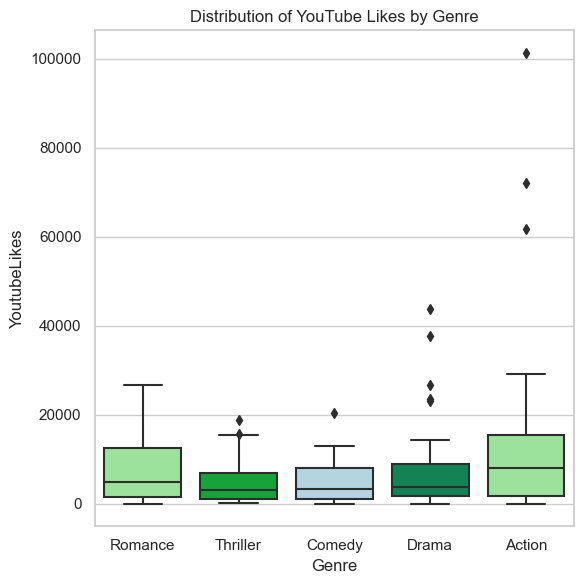

In [15]:
# Create a boxplot to compare the distribution of YouTube likes for each genre
colors=['lightgreen', '#00BA2D','lightblue', '#009658']
plt.figure(figsize=(6, 6))
plt.title('Distribution of YouTube Likes by Genre')
sns.boxplot(x='Genre', y='YoutubeLikes', data=data, palette=colors) # data source

# Show the plot
plt.tight_layout()
plt.show()

### <font color='darkblue'> Interpretation
<font color='darkblue'> Since the median of right most box which represents the genre Action is comparetively higher and it has the widest box, it has more youtube likes.</font>

####  <font color='#b25600'> 12. Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes,YoutubeDislikes are highly correlated? Note: Draw pair plot or heatmap.

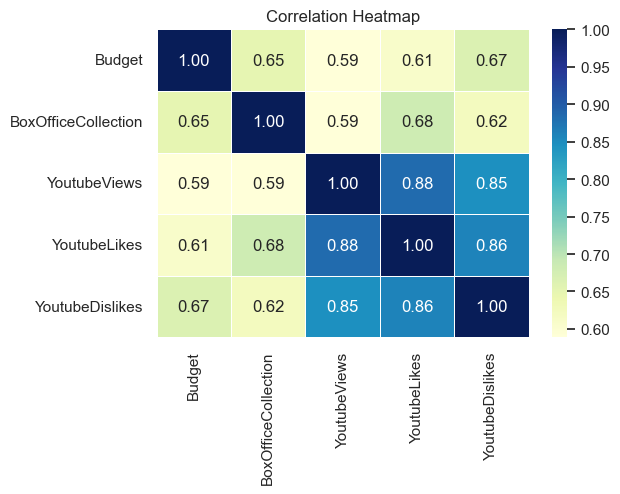

In [33]:

# Select the relevant columns
selected_columns = ['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']
selected_data = data[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

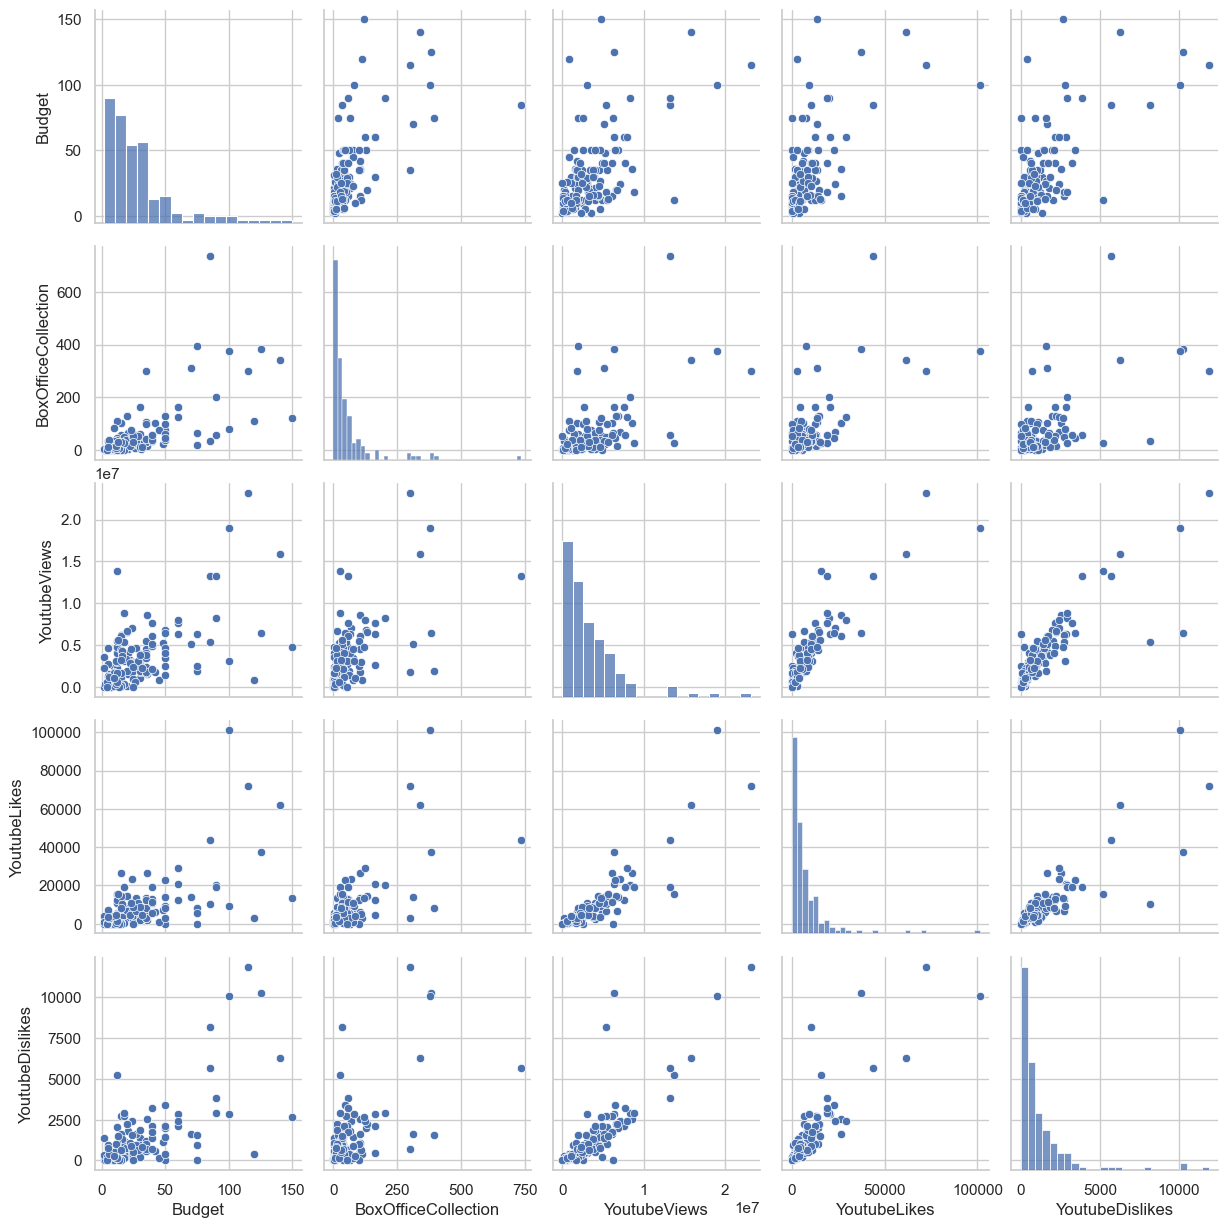

In [34]:
# Pairplot
sns.pairplot(selected_data)

## <font color='#b25600'> Problem_02: Use the SAheart Dataset to Answer Questions 13 to 20.
The dataset SAheart.data is taken from the link below:
http://www-stat.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.data
The dataset contains retrospective sample of males in a heart-disease high-risk region of the Western Cape, South Africa. There are roughly two controls per case of Coronary Heart Disease (CHD). Many of the CHD-positive men have undergone blood pressure reduction treatment and other programs to reduce their risk factors after their CHD event. In some cases, the measurements were made after these treatments. These data are taken from a larger dataset, described in Rousseauw et al. (1983), South African Medical Journal. It is a tab separated file (csv) and contains the following columns (source: http://www-stat.stanford.edu)

### <font color='#b25600'>  Dataset Description
* sbp – Systolic blood pressure
* tobacco – Cumulative tobacco (kg)
* ldl – Low densiity lipoprotein cholesterol
* adiposity
* famhist – Family history of heart disease (Present, Absent)
* typea – Type-A behavior
* obesity
* alcohol – Current alcohol consumption
* age – Age at onset
* chd – Response, coronary heart disease

In [17]:
# creating dataframe from data source
url="https://hastie.su.domains/ElemStatLearn/datasets/SAheart.data"
data2=pd.read_csv(url)

#setting row.names as index
data2=data2.set_index('row.names')
data2.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


####  <font color='#b25600'> 13. How many records are present in the dataset? Print the metadata information of the dataset.

In [18]:
# No of records
records=data2.shape[0]
print(records,' records are present in the dataset.')

#metadata information
#data2.info()
display('Metadata information :')
print('_'*40)
data2.info()


462  records are present in the dataset.


'Metadata information :'

________________________________________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 1 to 463
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 39.7+ KB


####  <font color='#b25600'>  14. Draw a bar plot to show the number of persons having CHD or not in comparison to they having family history of the disease or not.

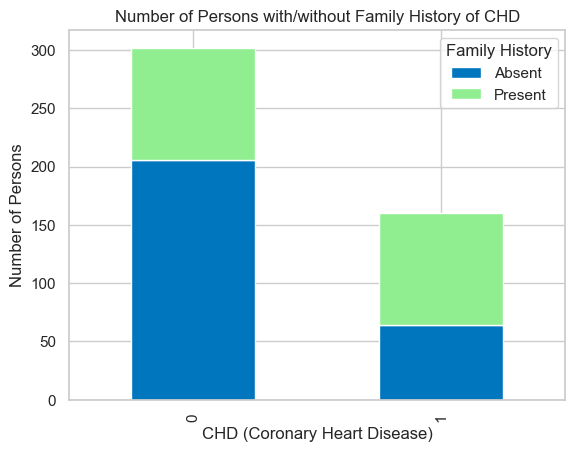

In [19]:
# Group the data by the presence or absence of CHD (Coronary Heart Disease)
chd_groups = data2.groupby("chd")

# Count the number of persons with and without family history of CHD in each group
family_history_counts = chd_groups["famhist"].value_counts()

# Create a bar plot
colors = ["#0076BE", "lightgreen"]
family_history_counts.unstack().plot(kind="bar", stacked=True, color=colors)
plt.xlabel("CHD (Coronary Heart Disease)")
plt.ylabel("Number of Persons")
plt.title("Number of Persons with/without Family History of CHD")
plt.legend(title="Family History", loc="upper right")
plt.show()

####  <font color='#b25600'> 15. Does age have any correlation with sbp? Choose appropriate plot to show the relationship.

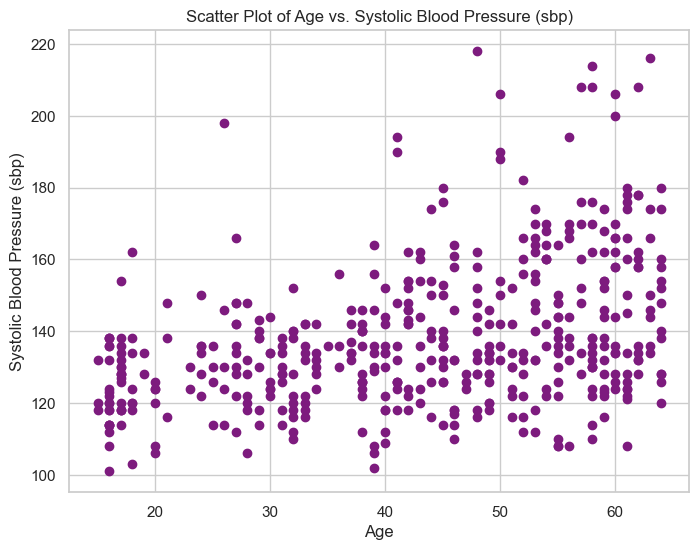

In [20]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data2['age'], data2['sbp'], color='#7D1B7E')
plt.title('Scatter Plot of Age vs. Systolic Blood Pressure (sbp)')
plt.xlabel('Age')
plt.ylabel('Systolic Blood Pressure (sbp)')
plt.grid(True)

# Show the plot
plt.show()


In [21]:
# correlation
correlation=data2['age'].corr(data2['sbp'])
print(f"Correlation Coefficient: {correlation:.2f}")

Correlation Coefficient: 0.39


### <font color='darkblue'> Interpretation
<font color='darkblue'> According to the scatter plot and the correlation coefficients (.39) there is a positive but very weak relationship between SBP and Age.</font>

####  <font color='#b25600'> 16. Compare the distribution of tobacco consumption for persons having CHD and not having CHD. Can you interpret the effect of tobacco consumption on having coronary heart disease?

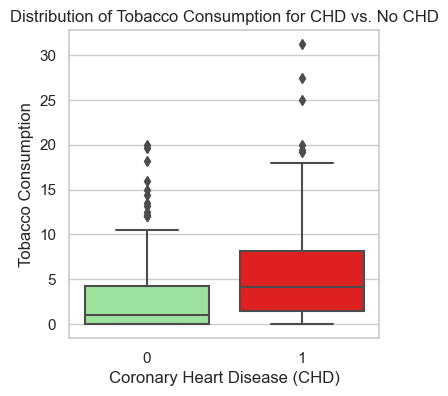

In [22]:
plt.figure(figsize=(4, 4))
colors=['lightgreen', 'red']
sns.boxplot(x='chd', y='tobacco', data=data2, palette=colors)
plt.title('Distribution of Tobacco Consumption for CHD vs. No CHD')
plt.xlabel('Coronary Heart Disease (CHD)')
plt.ylabel('Tobacco Consumption')
plt.show()

### <font color='darkblue'> Interpretation
<font color='darkblue'> According to the above box plots the median of tobacco consumption (the line inside the box) is higher for individuals with CHD ('1') compared to those without CHD ('0'), it implies that there might be a positive correlation between tobacco consumption and CHD.</font>

####  <font color='#b25600'>  17. How are the parameters sbp, obesity, age and ldl correlated? Choose the right plot to show the relationships.

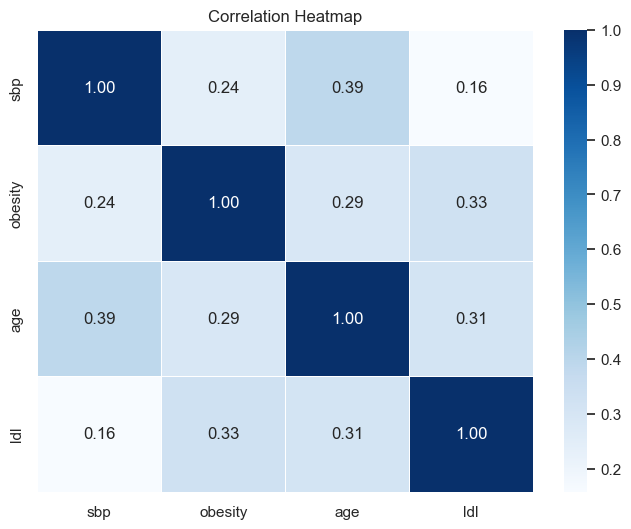

In [23]:
# Select the relevant columns
selected_columns = ["sbp", "obesity", "age", "ldl"]
selected_data = data2[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

### <font color='darkblue'> Interpretation
<font color='darkblue'> There is not significant relationship between the parameters except sbp and age.</font>

####  <font color='#b25600'> 18. Derive a new column called agegroup from age column where persons falling in different age ranges are categorized as below.
* (0–15): young
* (15–35): adults
* (35–55): mid
* (55–): old

In [24]:
age_bins = [0, 15, 35, 55, np.inf]
age_labels = ['young', 'adults', 'mid', 'old']

# Use pd.cut() to create the 'agegroup' column
data2['agegroup'] = pd.cut(data2['age'], bins=age_bins, labels=age_labels, right=False)

# Display the DataFrame with the new 'agegroup' column
print(data2[['age', 'agegroup']])

           age agegroup
row.names              
1           52      mid
2           63      old
3           46      mid
4           58      old
5           49      mid
...        ...      ...
459         58      old
460         52      mid
461         55      old
462         40      mid
463         46      mid

[462 rows x 2 columns]


####  <font color='#b25600'> 19. Find out the number of CHD cases in different age categories. Do a barplot and sort them in the order of age groups.

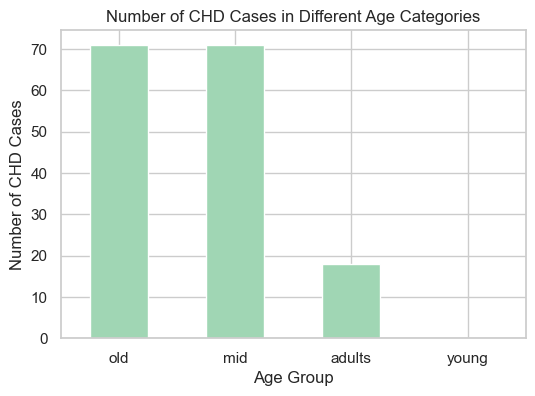

In [25]:
# Group the data by 'agegroup' and calculate the number of CHD cases in each group
chd_counts = data2[data2['chd'] == 1]['agegroup'].value_counts().sort_index(ascending=False)

# Create a barplot
plt.figure(figsize=(6, 4))
chd_counts.plot(kind='bar', color='#A0D6B4')
plt.xlabel('Age Group')
plt.ylabel('Number of CHD Cases')
plt.title('Number of CHD Cases in Different Age Categories')
plt.xticks(rotation=0)
plt.show()

### <font color='darkblue'> Interpretation
<font color='darkblue'> There are less number of CHD cases among adults comparing to mid and old age people.</font>

####  <font color='#b25600'> 20. Draw a box plot to compare distributions of ldl for different age groups.

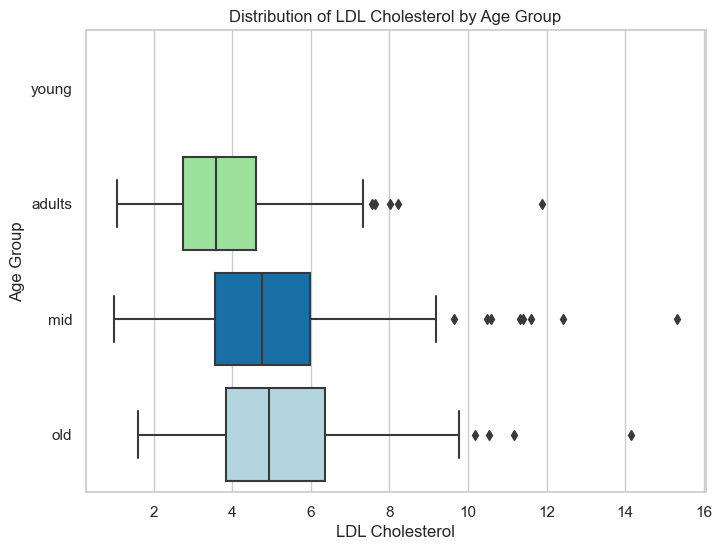

In [26]:
plt.figure(figsize=(8, 6))
colors=['lightblue','lightgreen', '#0076BE']
sns.boxplot(x='ldl', y='agegroup', data=data2, palette=colors)
plt.title('Distribution of LDL Cholesterol by Age Group')
plt.ylabel('Age Group')
plt.xlabel('LDL Cholesterol')
plt.show()

### <font color='darkblue'> Interpretation
<font color='darkblue'> The age group adult has less LDL Cholesterol comparing to the age groups mid and old.</font>
    